<h1 style="color: blue">Cadeia de Markov para a geração textos</h1>

<h3>Cadeia de Markov</h3>

<p>A Cadeia de Markov é uma sequência simulada de eventos. É um <span style="font-weight: bold">processo estocástico</span>, ou seja, <span style="font-weight: bold">totalmente aleatório</span>. Isso quer dizer que a ida para um estado futuro depende APENAS do estado presente.</p>

<p>Cada evento de uma sequência vem de um conjunto de resultados. Cada resultado determinará o que virá depois. Todas as informações necessárias para predizer o próximo evento estão contidas no evento mais recente. Em outras palavras, significa dizer que conhecer toda a história não ajuda a predizer o próximo resultado.</p>

<p>Algoritimos de <span style="font-weight: bold">Deep Reinforcement Learning</span>, de maneira geral, seguem um <span style="font-weight: bold">Processo de Decisão de Markov - Markov Decission Process (MDP)</span> que é decorrente da Cadeia de Markov.</p>

<h3>Qual a probabilidade de um estado transitar para um outro?</h3>

<p>Supondo que tenhamos dois estados X e Y, teremos 4 possibilidades de transição já que um estado pode ir para ele mesmo:</p>

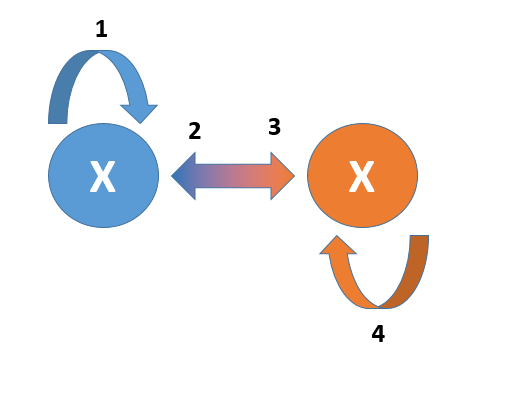

<p>Para sabermos qual o próximo estado devemos calcular a probabilidade de transisção dele, ou seja, <span style="font-weight: bold">quais são as chances de mudança de um estado para outro</span>.</p>

<p>Uma das maneiras de calcularmos essa possibilidade de mudança de estados é usando a <span style="font-weight: bold">MATRIZ DE TRANSIÇÃO!</span></p>

<h3>Matriz de Transição</h3>

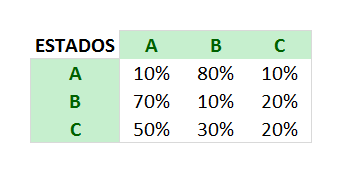

<p>Podemos representar a Matriz de Transição por meio da tabela acima, onde os estados são representados por A, B e C. Cada valor(%) das células representa a probabilidade de transição de um estado para outro, por exemplo:</p>
<h4><ul><li>A probabilidade de a partir do estado presente A (linha) ir para o  estado futuro B(coluna) é de 80%.</li><ul></h4>


<p>A representação de toda a tabela fica assim:</p>

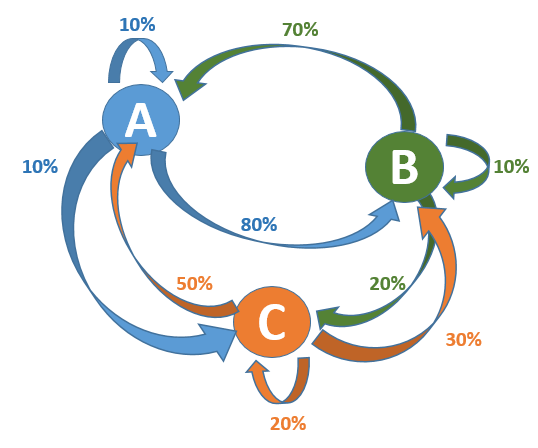

<p>A <span style="color:blue; font-weight: bold;">Cadeia de Markov</span> determina a <span style="color:blue; font-weight: bold;">probabilidade</span> de "saltar" de uma determinado estado para qualquer outro.</p>

<p>A distribuição de probabilidade condicional de estados futuros depende apenas do estado presente, sem levar em consideração os estados passados.</p>

<h3>Qual a relação da Cadeia de Markov com textos?</h3>

<p>Podemos imaginar as palavras como estados e a partir de uma determinada palavra podemos avançar para uma próxima.</p>

<p>Se, por exemplo, dividirmos uma frase em tokens podemos fazer a analogia de que cada token(palavra) é um estado. Assim, uma frase ou sentença pode ser compreendida com uma sequência de ESTADOS.</p>

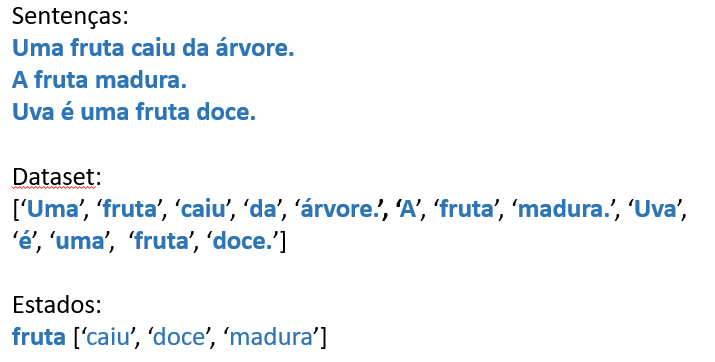

<p>Para simular eventos/estados com base em textos, utilizamos um dataset com palavras que estejam em um contexto ou que tenham alguma relação. Depois, cada palavra é armazenada junto com sua(s) sucessora(s).</p>

<p>Podemos armazezar todos os ESTADOS possíveis em um dicionário.</p>
<p>Cada <span style="color:blue;">CHAVE</span> do dicionário representa um <span style="color:blue;">ESTADO</span> e o conjunto de <span style="color:blue;">VALORES</span> representam os <span style="color:blue;">ESTADOS POSSÍVEIS</span> de se atingir a partir daquele.</p>

<h3>Aplicando Markov para gerar textos aleatórios!</h3>

1. Importando o corpus

In [20]:
corpus = open('discurso.txt').read()

In [21]:
corpus[:200]

'Boa tarde, é uma honra, uma satisfação, estar aqui nessa região maravilhosa que é a nossa região Amazônica. Prezado governador Wilson Lima, para economia de tempo, cumprimento a todos em nome dele ent'

2. Gerar tokens da sentença

In [22]:
corpus_split = corpus.split()

In [23]:
corpus_split[:8]

['Boa', 'tarde,', 'é', 'uma', 'honra,', 'uma', 'satisfação,', 'estar']

3. Criar função para separar os tokens em bigramas (sentença + sua sucessora)

In [25]:
def paresDeTokens(sent):
    for x in range(len(sent)-1):
        yield (sent[x], sent[x+1])
        #return (sent[x], corpus[x+1])

In [26]:
pares = paresDeTokens(corpus_split)
#pares = list(pares)#opcional transformar em lista

In [10]:
#type((pares))

4. Criar um dicionário para armazenar cada palavra(estado) com seu conjunto de estados futuros.

In [27]:
dicionario = {}

for palavra1, palavra2 in pares:
    #print(palavra1, palavra2)
    if palavra1 in dicionario.keys():
        dicionario[palavra1].append(palavra2)
    else:
        dicionario[palavra1] = [palavra2]

In [28]:
for chave, valor in dicionario.items():
    print(chave, valor)

Boa ['tarde,']
tarde, ['é']
é ['uma', 'a', 'de', 'verificar', 'essa', 'a', 'o', 'exuberante.', 'importante', 'o', 'uma', 'uma', 'nesta', 'apenas', 'o', 'o', 'cassada,', 'impeachment:', 'golpe.', 'um', 'mal', 'crime', 'ser', 'a', 'perceber', 'que', 'sábio', 'luta', 'longa.', 'feita', 'o']
uma ['honra,', 'satisfação,', 'empresa', 'linha', 'área', 'forma', 'legislação', 'declaração', 'entrevista,', 'declaração.', 'vez,', 'presidente', 'pessoa', 'democracia,', 'presidenta', 'eleição', 'fiadora', 'espécie', 'vez', 'farsa', 'luta']
honra, ['uma']
satisfação, ['estar']
estar ['aqui']
aqui ['nessa', 'a', 'os', 'fosse', 'além', 'tem', 'sabem,']
nessa ['região']
região ['maravilhosa', 'Amazônica.', 'maravilhosa.', 'aqui', 'que', 'exuberante,', 'tem', 'maravilhosa', 'maravilhosa.']
maravilhosa ['que', 'aqui,']
que ['é', 'eu', 'antes', 'essa', 'o', 'um', 'novas', 'sonhar,', 'nossa', 'minguado,', 'esteja', 'eu', 'em', 'abriram', 'ela', 'em', 'tenhamos', 'é', 'nós', 'obtive', 'tem', 'qualquer', 'por

5. Escolhendo aleatóriamente uma palavra para iniciar o texto.

In [33]:
import numpy as np
from pymarkovchain import MarkovChain

In [30]:
primeira_palavra = np.random.choice(corpus_split)
primeira_palavra

'nunca'

In [31]:
escolha = [primeira_palavra]
numero_palavras = 30

6. Gerando texto aleatório a partir da primeira palavra, escolhendo a sucessora de acordo com o dicionário de possibilidades.

In [32]:
for i in range(numero_palavras):
    escolha.append(np.random.choice(dicionario[escolha[-1]]))
    #print(escolha)
' '.join(escolha)
#print(' '.join(escolha))

'nunca recebi propinas, jamais compactuei com o que novas áreas riquíssimas e ver a biodiversidade, estamos trabalhando no processo frágil, juridicamente inconsistente, um impeachment fraudulento, um brasileiro e só a conheço'

In [34]:
mc = MarkovChain("./markov")

In [35]:
mc.generateDatabase(corpus)
mc.generateString()

'Pessoas com outros pensamentos querendo fazer com que o golpe não visa apenas me destituir, destituir uma presidenta eleita pelos 54 milhões, que eu dei aos nossos ministros, que em grande parte são pessoas que abriram mão de muita coisa para trabalhar junto ao Governo, e tratando da coisa pública com o orçamento mais que sonhar, temos a certeza de que estou sendo alvo deve-se ao fato de que, como presidenta, nunca aceitei chantagem de qualquer natureza'

<h3>Como podemos melhorar o modelo?</h3>

<p>Uma das meneiras de aprimoramento é com a utilização do <span style="font-weidght: bold">Processo de Decisão de Markov - MDP.</span></p>

<h5>Processo de Decisão de Markov</h5>
<p>a tomada de decisões onde os resultados são parcialmente aleatórios e parcialmente sob controle do agente.</p>
<p>O MDP utiliza as seguintes propriedades:</p>
<ul>
    <li>Conjunto finito de ESTADOS (S);</li>
    <li>Conjunto finito de AÇÕES (A);</li>
    <li>PROBABILIDADE (P);</li>
    <li>RECOMPENSA (R);</li>
    <li>FATOR DE DESCONTO (Y);</li>
</ul>

Existem outras possibilidades de melhoria como:
<ul><li>Aumento do corpus</li>
<li>Controle de pontuação</li></ul>

Fontes: 
https://towardsdatascience.com/simulating-text-with-markov-chains-in-python-1a27e6d13fc6

https://medium.com/botsbrasil/gerando-texto-com-cadeias-de-markov-usando-python-313e67a0e713

https://www.gov.br/planalto/pt-br/acompanhe-o-planalto/discursos/

https://paulovasconcellos.com.br/explicando-deep-reinforcement-learning-com-super-mario-ao-inv%C3%A9s-de-matem%C3%A1tica-4c77392cc733

In [24]:
len(corpus_split)

2419